In [23]:
import numpy as np

data_x = np.linspace(1.0, 10.0, 100)[:, np.newaxis]
data_y = np.sin(data_x) + 0.1*np.power(data_x,2) + 0.5*np.random.randn(100,1)
data_x /= np.max(data_x)

In [24]:
import matplotlib.pyplot as plt

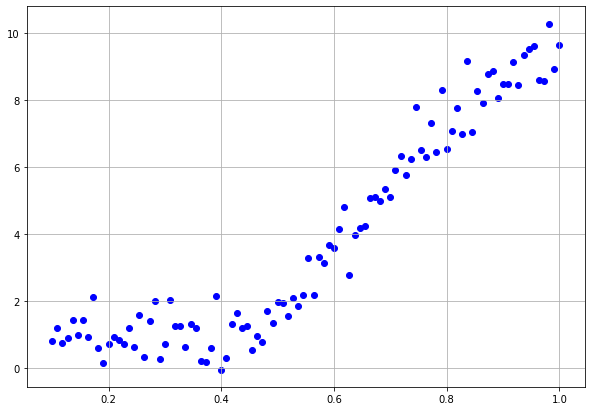

In [25]:
plt.figure(figsize=(10, 7))
plt.grid()
plt.scatter(data_x, data_y, color='blue')

In [26]:
data_x_stacked = np.hstack((np.ones_like(data_x), data_x))

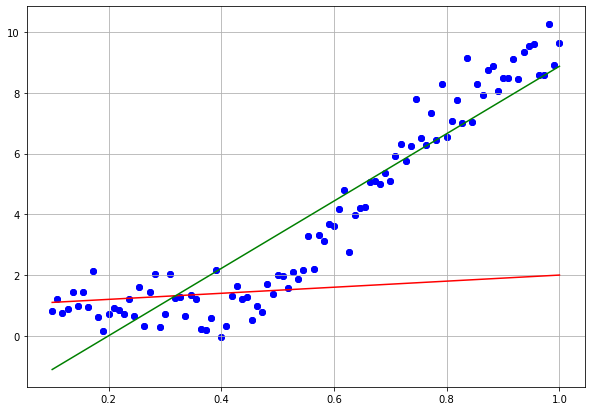

In [50]:
weights = [1.0, 1.0] #np.random.randn(2)
alpha = 0.5
iters = 100
epsilon = 1e-2

def compute_gradients():
    errors = data_y - np.dot(data_x_stacked, weights)[:, np.newaxis]
    gradients = np.dot(data_x_stacked.T, errors) * -(2.0/len(data_x_stacked))
    
    return np.mean(np.power(errors, 2)), gradients.flatten()
plt.figure(figsize=(10, 7))
plt.grid()
i = 0
while i < iters:
        i = i + 1
        loss, gradients = compute_gradients()
        if i == 1:
            plt.scatter(data_x, data_y, color='blue')
            predictions = np.dot(data_x_stacked, weights)[:, np.newaxis]
            plt.plot(data_x, predictions, color='red')
        prev_loss = loss
        new_weights = weights - alpha*gradients
        if np.sum(abs(new_weights-weights)) < epsilon:
            plt.scatter(data_x, data_y, color='blue')
            predictions = np.dot(data_x_stacked, weights)[:, np.newaxis]
            plt.plot(data_x, predictions, color='green')
            break
        weights = new_weights